# AE308: Control Theory

## Soham S. Phanse, Roll no. 19D170030, IIT Bombay

## Project Codes

# Library Imports

In [17]:
!pip install control
from control import *

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import bokeh as bkh
import altair as alt

from ipywidgets import interactive, interact, interact_manual

In [18]:
from IPython.display import display, Latex

# Requirements to dominant pole conversion

$ \% OS = 20 \% $
$T_s = 1.5 seconds$

$$ M_p = e^{-\frac{\piζ}{\sqrt{1-ζ^2}}} = 0.2 \longrightarrow ζ = 0.456$$

$$ T_s \approx \frac{4}{\zeta \omega_n} = 1.5 \longrightarrow ω_n = 5.8479$$

$$ w_d = w_n\sqrt{1-\zeta^2} = 5.8479\times0.8899 = 5.2045$$

$$ p_{1, 2} = -\zeta\omega_n \pm iw_d = -2.67 \pm 5.2045i $$

$$ \zeta = cos\phi \longrightarrow \phi = cos^{-1}\zeta $$

$$ \phi = \pm 62.8707^\circ $$

$$ 

$$ (s-p_1)(s-p_2) = s^2 + (-p_1 - p_2)s + p_1p_2 =\rightarrow s^2 + 2\zeta\omega_ns + \omega_n^2$$

$$ p_{1,2} = -lcos\phi \pm ilsin\phi $$

$$ p_1p_2 = l^2 = \omega_n^2 \longrightarrow l = 5.8479 $$

$$ p_{1,2} = -5.8479 \left( 0.456 + 0.8899i \right ) = -2.67 \pm 5.2045i$$

# Open and Closed Loop Poles

In [19]:
open_poles = np.array([0, -3, -6])
closed_poles = np.array([[-2.67, 5.2045], [-2.67, -5.2045]])

# Root Locus of Uncompensated System

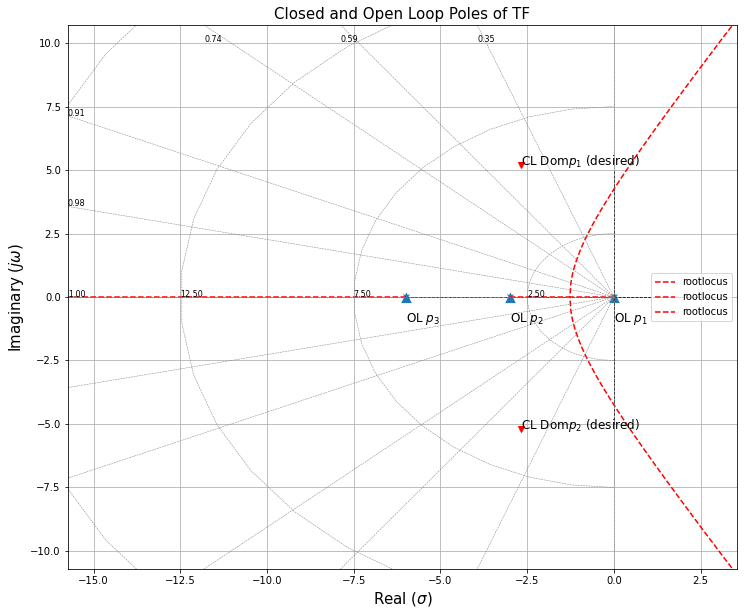

In [20]:
sys = tf([1], [1, 9, 18, 0])
plt.figure(figsize=(12, 10))
root_locus(sys, plotstr='r--');
sns.scatterplot(x=open_poles, y=np.zeros_like(open_poles), marker='^', s=150)
plt.plot(closed_poles[:, 0], closed_poles[:, 1], 'rv')
plt.grid(1)
plt.hlines(0, -6, 3, linestyle='--', linewidth=0.8)
plt.vlines(0, -5, 5, linestyle='--', linewidth=0.8)
plt.title('Closed and Open Loop Poles of TF', fontsize=15)
plt.xlabel('Real ($\sigma$)', fontsize=15)
plt.ylabel('Imaginary ($j\omega$)', fontsize=15)
plt.annotate(xy=(closed_poles[0, 0], closed_poles[0, 1]), s='CL Dom$p_1$ (desired)', fontsize=12)
plt.annotate(xy=(closed_poles[1, 0], closed_poles[1, 1]), s='CL Dom$p_2$ (desired)', fontsize=12)
plt.annotate(xy=(0, -1), s='OL $p_1$', fontsize=12)
plt.annotate(xy=(-3, -1), s='OL $p_2$', fontsize=12)
plt.annotate(xy=(-6, -1), s='OL $p_3$', fontsize=12);

# Angle Calculations - Desired Root Locus

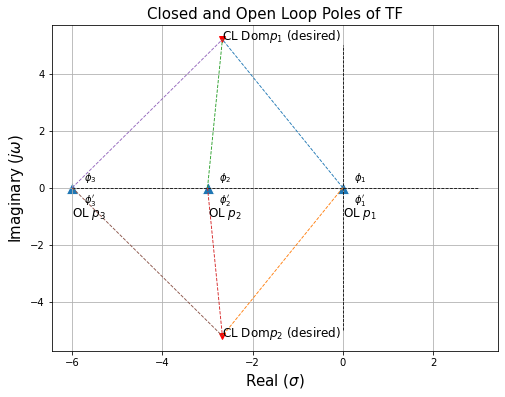

In [21]:
plt.figure(figsize=(8, 6));
sns.scatterplot(x = open_poles, y=np.zeros_like(open_poles), marker='^', s=150);
plt.plot(closed_poles[:, 0], closed_poles[:, 1], 'rv');
plt.grid(1);
plt.hlines(0, -6, 3, linestyle='--', linewidth=0.8);
plt.vlines(0, -5, 5, linestyle='--', linewidth=0.8);
plt.title('Closed and Open Loop Poles of TF', fontsize=15);
plt.xlabel('Real ($\sigma$)', fontsize=15);
plt.ylabel('Imaginary ($j\omega$)', fontsize=15);
plt.annotate(xy=(closed_poles[0, 0], closed_poles[0, 1]), s='CL Dom$p_1$ (desired)', fontsize=12);
plt.annotate(xy=(closed_poles[1, 0], closed_poles[1, 1]), s='CL Dom$p_2$ (desired)', fontsize=12);
plt.annotate(xy=(0, -1), s='OL $p_1$', fontsize=12);
plt.annotate(xy=(-3, -1), s='OL $p_2$', fontsize=12);
plt.annotate(xy=(-6, -1), s='OL $p_3$', fontsize=12);
for each in open_poles:
  plt.plot([each, closed_poles[0][0]], [0, closed_poles[0][1]], linewidth=0.9, linestyle='--')
  plt.plot([each, closed_poles[1][0]], [0, closed_poles[1][1]], linewidth=0.9, linestyle='--')
#plt.plot([0, -2.67], [0, 4.609], linewidth=0.9, linestyle='--');
#plt.plot([-3, -2.3617], [0, 4.609], linewidth=0.9, linestyle='--');
#plt.plot([-6, -2.3617], [0, 4.609], linewidth=0.9, linestyle='--');
plt.annotate(xy=(0.25, 0.25), s='$ \phi_1 $');
plt.annotate(xy=(-2.75, 0.25), s='$ \phi_2 $');
plt.annotate(xy=(-5.75, 0.25), s='$ \phi_3 $');
plt.annotate(xy=(0.25, -0.5), s='$ \phi_1\'$');
plt.annotate(xy=(-2.75, -0.5), s='$ \phi_2\'$');
plt.annotate(xy=(-5.75, -0.5), s='$ \phi_3\'$');

# Angle Criterion Calculations

$$ \phi_1 = tan^{-1}\left(\frac{5.2045}{2.677}\right) = 180 - 62.7940 = 117.1586^\circ$$

$$ \phi_2 = tan^{-1}\left(\frac{5.2045}{\frac{1}{3}}\right) = 86.5^\circ$$

$$ \phi_3 = tan^{-1}\left(\frac{5.2045}{\frac{10}{3}}\right) = 57.3616^\circ$$

$$ \phi_1 + \phi_2 + \phi_3 = 117.1586 + 86.5 + 57.3616 = 261.0202^\circ $$

$$ 261.0202 + \theta_p - \theta_z = 180^\circ \longrightarrow \theta_p - \theta_z = -81.0202^\circ $$

# Lead Compensator Automation

In [22]:
def euclidean_distance(p1, p2):
  return np.linalg.norm(np.array(p1)-np.array(p2))

def automate(polex, poley, zerox, zeroy):
  
  ## default parameters
  ### desired dominant closed loop pole values
  clpx, clpy= -2.67, 5.2045

  # plotting
  plt.figure(figsize=(8, 6))
  plt.title('Lead Compensator Design', fontsize=15)
  plt.xlabel('Real ($\sigma$)', fontsize=15)
  plt.ylabel('Imaginary (j$\omega$)', fontsize=15)

  plt.scatter(zerox, zeroy, marker='o',c='g')
  plt.annotate(xy=(zerox, zeroy), s='$L_0$')

  plt.scatter(polex, poley, marker='o',c='r')
  plt.annotate(xy=(polex, poley), s='$L_p$')

  plt.scatter([clpx, clpx], [clpy, -clpy], marker='o', c='b')
  plt.annotate(xy=(clpx, clpy), s='$CLP_1$')
  plt.annotate(xy=(clpx, -1*clpy), s='$CLP_2$')

  plt.scatter([0, -3, -6], [0, 0, 0], marker='v', c='g')

  plt.hlines(0, -10.0, 2, linestyle='--', linewidth=1.0)
  plt.vlines(0, -5.0, 5.0, linestyle='--', linewidth=1.0)

  counter = 0
  for each in [0, -3, -6]:
    plt.plot([polex, clpx], [poley, clpy], linestyle='--', linewidth=1.0)
    plt.plot([zerox, clpx], [zeroy, clpy], linestyle='--', linewidth=1.0)
    plt.plot([each, clpx], [0, clpy], linestyle='--', linewidth=1.0)
    plt.annotate(xy=(each, 0), s='$OPL_{%.0f}$'%counter)
    counter += 1

  plt.grid(1)

  # calculations
  pole, zero, clp = np.array([polex, poley]), np.array([zerox, zeroy]), np.array([clpx, clpy])
  lp, lz = euclidean_distance(pole, clp), euclidean_distance(zero, clp)
  xp, xz = abs((pole-clp)[0]), abs((zero-clp)[0])
  tp, tz = np.arccos(xp/lp), np.arccos(xz/lz)
  tpr, tzr = tp, tz
  if pole[0]>clp[0]:
    tpr = 180 - tp
  if zero[0]>clp[0]:
    tzr = 180 - tz
  print('$\\phi_{p}$ = %.4f, $\\phi_{z}$ = %.4f, $\\phi_{p} - \\phi_{z}$ = %.4f'%(tpr*180/np.pi, tzr*180/np.pi, (tpr-tzr)*180/np.pi))
  return (tpr*180/np.pi, tzr*180/np.pi)

In [23]:
interact(automate, polex = (-100.0, -3.0), poley = (-5.0, 5.0), zerox = (-10.0, -2.0, 0.0001), zeroy = (-5.0, 5.0));

interactive(children=(FloatSlider(value=-51.5, description='polex', max=-3.0, min=-100.0), FloatSlider(value=0…

# Root Locus in Compensated System

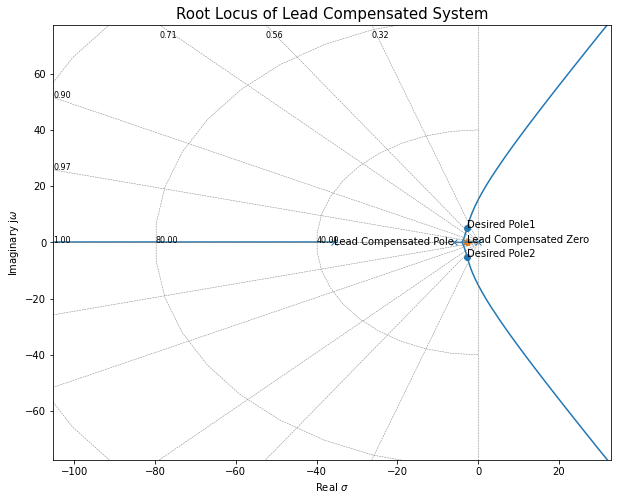

In [24]:
p, z, K = 35.6057, 2.67, 411
sys1 = tf([1, z], [1, p+9, 9*(p+2), 18*p, 0])
plt.figure(figsize=(10, 8))
root_locus(sys1);
plt.scatter([-2.67, -2.67], [-5.2045, 5.2045])
plt.title('Root Locus of Lead Compensated System', fontsize=15)
plt.xlabel('Real $\sigma$')
plt.ylabel('Imaginary j$\omega$')
plt.annotate(xy=(-35.6057, -1.0), s='Lead Compensated Pole')
plt.annotate(xy=(-2.67, 0.0), s='Lead Compensated Zero')
plt.annotate(xy=(-2.67, 5.2045), s='Desired Pole1')
plt.annotate(xy=(-2.67, -5.2045), s='Desired Pole2');


          5
----------------------
s^3 + 9 s^2 + 18 s + 5

0.9987775049368426


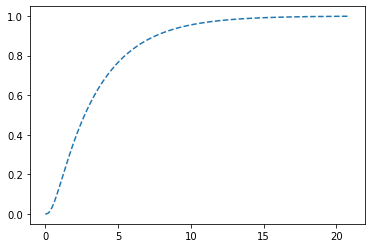

In [25]:
sys = tf([5],[1, 9, 18, 0])
sys1 = sys.feedback(1, -1)
print(sys1)

time, step_resp = step_response(sys)
time1, step_resp1 = step_response(sys1)

print(max(step_resp1))
plt.plot(time1, step_resp1, linestyle='--')

# Step Response of Uncompensated System (Closed Loop, Gain = 1)

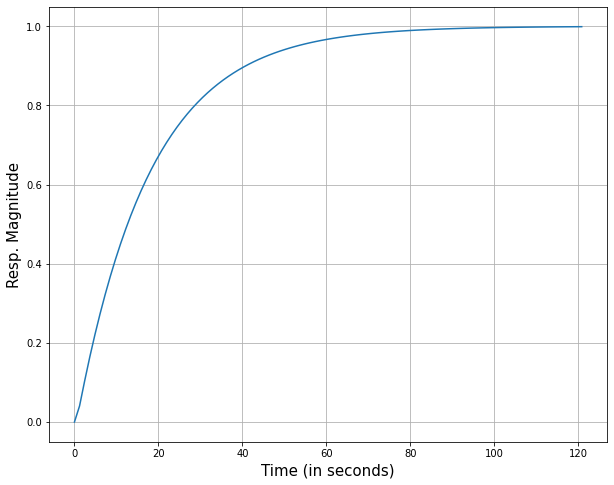

In [26]:
system = tf([1], [1, 9, 18, 1])
time, response = step_response(system)
plt.figure(figsize=(10, 8))
plt.plot(time, response)
maxm = max(response)
maxt = time[np.where(response==maxm)]
st = time[np.where(abs(response-0.98)<1e-2)]
#plt.hlines([max(response), 1], time[0], time[-1], linestyle='--', linewidth=0.9)
#plt.vlines(st[0], response[0], maxm, linestyle='--', linewidth=0.9)
#plt.title('Step Resp Uncompensated (K=1) OS = %.2f perc, $T_s$=%.2f s, Max(resp.) = %.2f'%(abs((1-maxm)*100), st[0],maxm), fontsize=15)
plt.grid(1)
plt.xlabel('Time (in seconds)', fontsize=15)
plt.ylabel('Resp. Magnitude', fontsize=15);

# Step Response Compensated System

In [27]:
def response(K, p, z, t_start=0, t_end=1):

  # system creation
  sys = tf([K, K*z], [1, p+9, 9*(p+2), 18*p+K, K*z])
  
  # simulation
  time_range = np.linspace(t_start, t_end, 1000)
  time, resp = step_response(sys, time_range)
  
  # plotting
  plt.figure(figsize=(10, 8))
  plt.plot(time, resp, label='Step Response')
  plt.plot(time, np.ones_like(time), linestyle='--', label='Step Input')
  plt.plot(time, np.ones_like(time)*max(resp), linestyle='--', label='Overshoot')
  plt.xlabel('Time (in seconds)')
  plt.ylabel('Amplitude')
  plt.title('Step Response of Compensated System')
  plt.grid(1)
  print('Steady State Error', resp[-1]-1)
  print('Max Amplitude= ', max(resp)) 
  print('Steady state amplitude= ', resp[-1])
  print('Overshoot percent = ', (max(resp)-1)*100)
  print('settling time = ', time[np.where(abs(resp - 0.98*resp[-1])<1e-2)][0])
  plt.legend()

In [28]:
interact(response, K=1200, p=35.6057, z=8/3)

interactive(children=(IntSlider(value=1200, description='K', max=3600, min=-1200), FloatSlider(value=35.6057, …

<function __main__.response>

# Ramp Response of Compensated System

In [29]:
def response(K, p, z, t_start=0, t_end=1):

  # system creation
  sys = tf([K, K*z], [1, p+9, 9*(p+2), 18*p+K, K*z])
  
  # simulation
  time_range = np.linspace(t_start, t_end, 1000)
  time, resp = forced_response(sys, time_range, time_range)

  # plotting
  #plt.figure(figsize=(10, 8))
  plt.plot(time, resp, label='Step Response')
  plt.plot(time, time_range, linestyle='--', label='Ramp Input')
  plt.xlabel('Time (in seconds)')
  plt.ylabel('Amplitude')
  plt.title('Step Response of Compensated System')
  plt.grid(1)
  print('Steady State Error = ', resp[-1]-time_range[-1])
  plt.legend()

In [30]:
interact(response, K=1200, p=35.6057, z=8/3)

interactive(children=(IntSlider(value=1200, description='K', max=3600, min=-1200), FloatSlider(value=35.6057, …

<function __main__.response>

In [31]:
z, p, K = 3.0, 49.43, 1650
sys = tf([K, K*z], [1, p+9, 9*(p+2), (18*p) + K, K*z])
sys

TransferFunction(array([1650., 4950.]), array([1.00000e+00, 5.84300e+01, 4.62870e+02, 2.53974e+03, 4.95000e+03]))

# All 4 Lead Compensators

## First Compensator (Original)

$$ G_{overall}(s) = \frac{1210(s+2.67)}{s^4 + 45.6057s^3 + 338.45s^2 + 1850.90s + 3226.67}$$

$$ p, z, K = -35.6057, -2.67,1210 $$

## Second (Additional First) Compensator

$$ G_{overall}(s) = \frac{1280s+ 3584}{ s^4 + 46.3 s^3 + 353.7 s^2 + 1951 s + 3584}$$

$$ p, z, K = -37.30, -2.80, 1280 $$

## Third (Additional Second) Compensator

$$ G_{overall}(s) = \frac{1430s+ 4147}{ s^4 + 51.48 s^3 + 400.3 s^2 + 2195 s + 4147}$$

$$ p, z, K = -42.48, -2.90, 1430 $$

## Fourth (Additional Third) Compensator

$$ G_{overall}(s) = \frac{1650}{ s^3 + 55.43 s^2 + 296.58 s + 1650}$$

$$ p, z, K = -49.43, -3.0, 1650 $$

# Angular Contribution of the Lead Compensator

Take the first lead compensator, 

$$ G_C(s) = \frac{s+2.67}{s+35.6057} $$

$$ \angle G_C(s) = \angle (s + 2.67) - \angle(s+35.6057) $$

$$ \angle (s+2.67) = \angle (\sigma + j\omega + 2.67) $$

$$ But, \hspace{2mm} \sigma = -2.67 \hspace{2mm} and \hspace{2mm} ω = 5.2045$$ 

$$ \angle(s+2.67) = \angle(5.2045j) = 90^\circ $$ 

$$ \angle(s+35.6057) = \angle(-2.67 + 5.2045j + 35.6057) $$

$$ \angle(s+35.6057) = \angle(32.9357 + 5.2045j) = tan^{-1}\frac{5.2045}{32.9357} = 8.9796^\circ$$

$$\angle G_C(s) = 90 - 8.9796 = 81.0203^\circ $$

# Steady State Errors

## First Compensator

$$ G_{closed}(s) = \frac{1210(s+2.67)}{s^4 + 45.6057s^3 + 338.45s^2 + 1850.90s + 3226.67}$$

$$ G_{open}(s) = \frac{1210(s+2.67)}{s^4 + 45.6057s^3 + 338.45s^2 + 640.9s}$$

$$ p, z, K = -35.6057, -2.67,1210 $$
 
$$ K_p = lim_{s\rightarrow0} G_{open}(s) = \frac{1210\times2.67}
{0} \rightarrow K_p \rightarrow \infty $$

$$ e_{ss, step} = \frac{1}{1+K_p} \rightarrow 0 $$

$$ K_v = lim_{s\rightarrow0}sG_{open}(s) =  \frac{1210*2.67}{640.9} = 5.040$$

$$ e_{ss, ramp} = \frac{1}{K_v} = 0.198$$



## Additional First (Second) Compensator

$$ G_{closed}(s) = \frac{1280s+ 3584}{ s^4 + 46.3 s^3 + 353.7 s^2 + 1951 s + 3584}$$

$$ G_{open}(s) = \frac{1280s + 3584}{s^4 + 46.3s^3 + 353.7s^2 + 671.4s}$$

$$ p, z, K = -37.30, -2.80, 1280 $$

$$ K_p = lim_{s\rightarrow0} G_{open}(s) = \frac{1280\times2.80}
{0} \rightarrow K_p \rightarrow \infty $$

$$ e_{ss, step} = \frac{1}{1+K_p} \rightarrow 0 $$

$$ K_v = lim_{s\rightarrow0}sG_{open}(s) =  \frac{1280\times2.80}{671.4} = 5.338$$

$$ e_{ss, ramp} = \frac{1}{K_v} = 0.187$$




## Additional Second (Third) Compensator
$$ G_{overall}(s) = \frac{1430s+ 4147}{ s^4 + 51.48 s^3 + 400.3 s^2 + 2195 s + 4147}$$

$$ p, z, K = -42.48, -2.90, 1430 $$

$$ G_{open}(s) = \frac{1430s + 4147}{s^4 + 51.48s^3 + 400.3s^2 + 764.6s}$$

$$ K_p = lim_{s\rightarrow0} G_{open}(s) = \frac{1430\times2.90}
{0} \rightarrow K_p \rightarrow \infty $$

$$ e_{ss, step} = \frac{1}{1+K_p} \rightarrow 0 $$

$$ K_v = lim_{s\rightarrow0}sG_{open}(s) =  \frac{1430\times2.90}{764.6} = 5.423$$

$$ e_{ss, ramp} = \frac{1}{K_v} = 0.184$$

## Additional Third (Fourth) Compensator

$$ G_{overall}(s) = \frac{1650}{ s^3 + 55.43 s^2 + 296.58 s + 1650}$$

$$ G_{open}(s) = \frac{1650}{s^3 + 55.43s^2 + 296.58s} $$

$$ p, z, K = -49.43, -3.0, 1650 $$

$$ K_p = lim_{s\rightarrow0} G_{open}(s) = \frac{1650}
{0} \rightarrow K_p \rightarrow \infty $$

$$ e_{ss, step} = \frac{1}{1+K_p} \rightarrow 0 $$

$$ K_v = lim_{s\rightarrow0}sG_{open}(s) =  \frac{1650}{296.58} = 5.563$$

$$ e_{ss, ramp} = \frac{1}{K_v} = 0.1797$$



# PI Controller Design

## Compensator 

$$ G_{open}(s) = \frac{1650}{s^3 + 55.43s^2 + 296.58s} $$

$$ p, z, K = -49.43, -3.0, 1650 $$

$$ G_{PI, open}(s) = \frac{1650 G_{PI}(s)}{s^3 + 55.43s^2 + 296.58s} $$

$$ K_v = lim_{s\rightarrow0}sG_{PI, open}(s) = 5.563lim_{s\rightarrow0}G_{PI}(s) \rightarrow \infty$$

$$ Hence, \hspace{2mm} lim_{s\rightarrow0}G_{PI}(s) \rightarrow \infty $$

$$ then, e_{ss, ramp} = \frac{1}{K_v} \rightarrow 0$$

## $K_v$ adjustment

$$K_v = \lim_{s\rightarrow0}sG_{PI}(s)G(s) = \lim_{s\rightarrow0}s\frac{K}{T_is}(T_is + 1)\frac{1650}{s(s^2+55.43s + 296.58)} \rightarrow \infty$$

$$K_p = \lim_{s\rightarrow0}G_{PI}(s)G(s) = \lim_{s\rightarrow0}\frac{K}{T_is}(T_is + 1)\frac{1650}{s(s^2+55.43s + 296.58)} \rightarrow \infty $$ 

# PI Compensated Simulation

## Angular Contribution of Zero at Dominant Poles

## Step Response with PI Controller

In [32]:
def PI_response_step(K, z):
  sys = tf([1650*K, 1650*K*z], [1, 55.43, 296.58, 1650*K, 1650*K*z])
  time, resp = step_response(sys)
  plt.plot(time, resp, label='Step Response')
  plt.plot(time, np.ones_like(time), label='Step Input', linestyle='--')
  plt.plot(time, np.ones_like(time)*max(resp), label='Overshoot', linestyle='--')

In [33]:
interact(PI_response_step, K=(0.0, 10.0), z=(0.0, 0.01, 0.001))

interactive(children=(FloatSlider(value=5.0, description='K', max=10.0), FloatSlider(value=0.005, description=…

<function __main__.PI_response_step>

## Ramp Response with PI Controller

In [34]:
def PI_response_ramp(K, z, start, end):
  time_range = np.linspace(start, end, 1000)
  sys = tf([1650*K, 1650*K*z], [1, 55.43, 296.58, 1650*K, 1650*K*z])
  time, resp = forced_response(sys, time_range, time_range)
  plt.plot(time, resp, label='Ramp Response')
  plt.plot(time_range, time_range, label='Ramp Input', linestyle='--')
  print('Steady State Error = ', time[-1] - resp[-1])

In [35]:
interact(PI_response_ramp, K=(0, 10, 0.01), z = (0, 0.1, 0.01), start=0, end=5)

interactive(children=(FloatSlider(value=5.0, description='K', max=10.0, step=0.01), FloatSlider(value=0.05, de…

<function __main__.PI_response_ramp>

## Both Response PI Compensated

In [36]:
def PI_both_response(K, z, start, end):
  time_range = np.linspace(start, end, 1000)
  sys = tf([1650*K, 1650*K*z], [1, 55.43, 296.58, 1650*K, 1650*K*z])
  time, resp = forced_response(sys, time_range, time_range)
  time2, resp2 = step_response(sys, time_range)
  ts = time2[np.where(abs(resp2 - 0.98)<1e-3)]

  fig, ax = plt.subplots(1, 2, figsize=(15, 5))

  ax[0].plot(time2, resp2, label='Step Response', linewidth=3)
  ax[0].plot(time2, np.ones_like(time2), label='Step Input', linestyle='--')
  ax[0].plot(time2, np.ones_like(time2)*max(resp2), label='Overshoot', linestyle='--')
  ax[0].legend(fontsize=15)
  ax[0].grid(1)
  ax[0].set_title('Step Response - PI Compensated', fontsize=15)
  ax[0].set_xlabel('Time (in seconds)', fontsize=15)
  ax[0].set_ylabel('Amplitude', fontsize=15)
  print('Steady State Error (Step) = ', abs(1-resp2[-1]))
  if len(ts)>=2:
    print('Settling time = ', ts[2])
  elif len(ts)==0:
    pass
  else:
    print('Settling time = ', ts[-1])
  print('Overshoot = ', max(resp2) - 1)

  ax[1].plot(time, resp, label='Ramp Response', linewidth=3)
  ax[1].plot(time_range, time_range, label='Ramp Input', linestyle='--')
  ax[1].legend(fontsize=15)
  ax[1].set_title('Step Response - PI Compensated', fontsize=15)
  ax[1].set_xlabel('Time (in seconds)', fontsize=15)
  ax[0].set_ylabel('Amplitude', fontsize=15)
  ax[1].grid(1)
  print('Steady State Error (Ramp) = ', time[-1] - resp[-1])

In [37]:
interact(PI_both_response, K=(0, 5, 0.001), z = (0, 0.1, 0.001), start=0, end=20);

interactive(children=(FloatSlider(value=2.0, description='K', max=5.0, step=0.001), FloatSlider(value=0.05, de…

## Final PI Compensated System

$$ G_{closed} = \frac{1650\times0.96\times(s+0.05)}{s^4 + 55.43s^3 + 296.58s^2 + 1650\times0.96s + 1650\times0.96\times0.05} = \frac{1584(s+0.05)}{s^4 + 55.43s^3 + 296.58s^2 + 1584s + 79.2}$$

# Steady State Error Automation


In [38]:
p, z, K = 35.6057, 2.67, 1210
sys = tf([K, K*z], [1, 9 + p, 9*(p+2), 18*p+ K, K*z])
s = np.linspace(-5, 5, 1000)
num = s + z
den = s**4 + (9+p)*(s**3) + (9*(p+2))*(s**2) + (18*p)*s

def f(s, p, z):
  num = s + z
  den = s**4 + (9+p)*(s**3) + (9*(p+2))*(s**2) + (18*p)*s
  print(num/den)

f(0, 35.6057, 2.67)

ZeroDivisionError: ignored